# Color Palette Extraction from WikiArt

## Learning Objectives
- Extract dominant colors from artworks using computational methods
- Understand how k-means clustering identifies color patterns
- Compare color palettes across different artists and movements
- Learn to export palettes for use in design projects

## 1. Setup and Imports

In [1]:
from renoir import ArtistAnalyzer
from renoir.color import ColorExtractor, ColorVisualizer

analyzer = ArtistAnalyzer()
extractor = ColorExtractor()
visualizer = ColorVisualizer()

## 2. Extract Artist Works

In [7]:
monet_works = analyzer.extract_artist_works('claude-monet', limit=10)
print(f"Extracted {len(monet_works)} works")

✓ Found 10 works by claude-monet
Extracted 10 works


## 3. Extract Dominant Colors

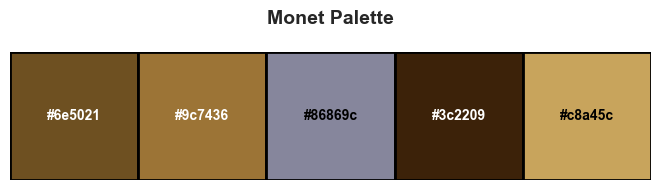

In [14]:
colors = extractor.extract_dominant_colors(monet_works[0]['image'], n_colors=5)
visualizer.plot_palette(colors, title="Monet Palette")